<a href="https://colab.research.google.com/github/Maureenchepkirui/30-Days-Of-Python/blob/main/Financial_Vulnerability_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling and Statistical Analysis of Household Financial Vulnerability

**Author:** Maureen Chepkirui  
**Environment:** Python (Google Colaboratory)  
**Dataset:** Malaysian Household Income and Expenditure Survey (HIES)

## Abstract
This study analyzes state-level household socioeconomic data to identify factors associated with financial vulnerability. Exploratory data analysis, statistical testing, and predictive modeling techniques were applied using Python to examine relationships between income, expenditure, poverty, and inequality indicators.


## 1. Introduction
Household financial vulnerability is a growing socioeconomic concern, particularly in contexts of income inequality and rising living costs. This project aims to analyze state-level household income and expenditure indicators in order to identify factors associated with financial vulnerability and assess their predictive potential using data science techniques.


## 2. Dataset Description
This study utilizes secondary data from the Malaysian Household Income and Expenditure Survey (HIES), published by the Department of Statistics Malaysia. The dataset contains state-level indicators including household income, expenditure, poverty rates, and income inequality measures for the year 2022.


## 3. Libraries and Computational Environment
The analysis was conducted using Python in a cloud-based Jupyter environment (Google Colaboratory). The following libraries were used for data manipulation, visualization, statistical analysis, and modeling.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from scipy.stats import pearsonr


## 4. Data Loading
The dataset was loaded directly from the official public data repository into the Python environment for analysis.


In [3]:
url = "https://storage.dosm.gov.my/hies/hies_state.csv"
df = pd.read_csv(url)

df.head()


,date,state,income_mean,income_median,expenditure_mean,gini,poverty
0,2022-01-01,Johor,8517,6879,5342,0.36646,4.6
1,2022-01-01,Kedah,5550,4402,3765,0.35938,9.0
2,2022-01-01,Kelantan,4885,3614,3505,0.38540,13.2
3,2022-01-01,Melaka,8057,6210,5707,0.36963,4.2
4,2022-01-01,Negeri Sembilan,6788,5226,4678,0.36853,4.4


## 5. Data Inspection and Summary Statistics
Initial inspection was performed to examine the structure of the dataset, variable types, and basic descriptive statistics.


In [4]:
df.shape


(16, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              16 non-null     object 
 1   state             16 non-null     object 
 2   income_mean       16 non-null     int64  
 3   income_median     16 non-null     int64  
 4   expenditure_mean  16 non-null     int64  
 5   gini              16 non-null     float64
 6   poverty           16 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.0+ KB


In [6]:
df.describe()


,income_mean,income_median,expenditure_mean,gini,poverty
count,16.00000,16.000000,16.000000,16.000000,16.000000
mean,7902.56250,6212.687500,4992.625000,0.358949,6.087500
std,2772.21685,2141.864506,1609.960533,0.027282,5.099395
min,4885.00000,3614.000000,3342.000000,0.300280,0.100000
25%,5778.50000,4679.000000,3885.750000,0.353507,2.375000
50%,7018.00000,5552.000000,4427.000000,0.367745,4.500000
75%,8329.50000,6885.250000,5433.250000,0.372835,7.875000
max,13473.00000,10234.000000,8897.000000,0.394910,19.700000


## 6. Feature Engineering
A financial vulnerability indicator was constructed using expenditure-to-income ratios and poverty thresholds to capture financial stress at the state level.


In [7]:
df["expenditure_ratio"] = df["expenditure_mean"] / df["income_mean"]

df[["state", "income_mean", "expenditure_mean", "expenditure_ratio"]]


,state,income_mean,expenditure_mean,expenditure_ratio
0,Johor,8517,5342,0.627216
1,Kedah,5550,3765,0.678378
2,Kelantan,4885,3505,0.717503
3,Melaka,8057,5707,0.708328
4,Negeri Sembilan,6788,4678,0.689157
5,Pahang,5777,4107,0.710923
6,Pulau Pinang,8267,5322,0.643764
7,Perak,5779,3903,0.675376
8,Perlis,5664,3834,0.676907
9,Selangor,12233,6770,0.553421


In [8]:
df["financial_vulnerable"] = (
    (df["expenditure_ratio"] > 0.65) | (df["poverty"] > df["poverty"].median())
).astype(int)

df[["state", "financial_vulnerable"]]


,state,financial_vulnerable
0,Johor,1
1,Kedah,1
2,Kelantan,1
3,Melaka,1
4,Negeri Sembilan,1
5,Pahang,1
6,Pulau Pinang,0
7,Perak,1
8,Perlis,1
9,Selangor,0


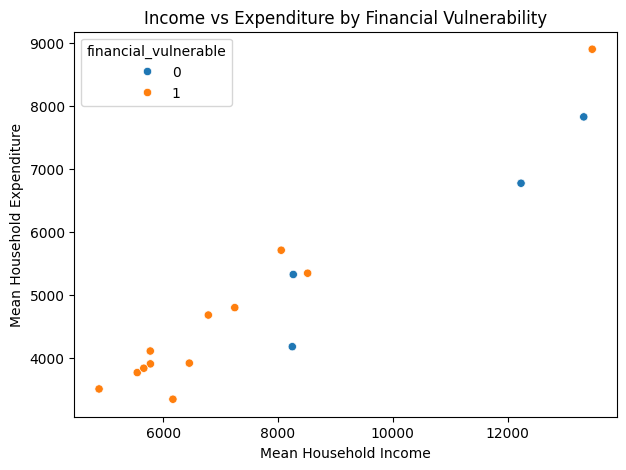

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="income_mean",
    y="expenditure_mean",
    hue="financial_vulnerable",
    data=df
)
plt.title("Income vs Expenditure by Financial Vulnerability")
plt.xlabel("Mean Household Income")
plt.ylabel("Mean Household Expenditure")
plt.show()


The scatter plot demonstrates that financially vulnerable states tend to exhibit expenditure levels that closely approach household income, while non-vulnerable states maintain greater income–expenditure separation. This pattern supports the hypothesis that higher expenditure burden contributes to financial vulnerability.

## 7. Exploratory Data Analysis
Exploratory data analysis was conducted to examine income and expenditure distributions, expenditure burden, and differences between financially vulnerable and non-vulnerable states.


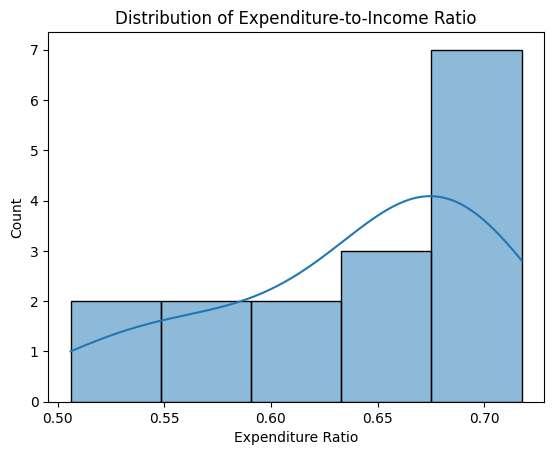

In [10]:
sns.histplot(df["expenditure_ratio"], kde=True)
plt.title("Distribution of Expenditure-to-Income Ratio")
plt.xlabel("Expenditure Ratio")
plt.show()


The distribution of the expenditure-to-income ratio suggests that several states allocate a substantial proportion of income to expenditure. Higher ratios indicate reduced financial flexibility, which may increase vulnerability to economic shocks.

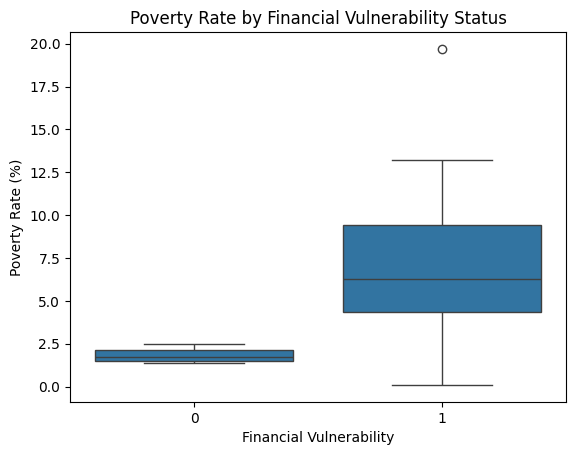

In [11]:
sns.boxplot(x="financial_vulnerable", y="poverty", data=df)
plt.title("Poverty Rate by Financial Vulnerability Status")
plt.xlabel("Financial Vulnerability")
plt.ylabel("Poverty Rate (%)")
plt.show()


The boxplot indicates that financially vulnerable states exhibit significantly higher poverty rates compared to non-vulnerable states. This suggests that poverty is strongly associated with the constructed financial vulnerability indicator, supporting the validity of the proxy measure used in this study.

## 8. Statistical Analysis
Statistical tests were applied to evaluate relationships between key socioeconomic variables and to assess differences between vulnerability groups.


In [12]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["income_mean"], df["expenditure_mean"])
corr, p_value


(np.float64(0.9562297482242386), np.float64(7.3493200044624645e-09))

A Pearson correlation analysis revealed a very strong positive relationship between mean household income and mean household expenditure (r = 0.96, p < 0.001). This indicates that states with higher income levels also tend to exhibit higher expenditure levels. However, this relationship does not imply causality and reflects aggregate spending behavior at the state level.

In [13]:
from scipy.stats import ttest_ind

vulnerable = df[df["financial_vulnerable"] == 1]["poverty"]
non_vulnerable = df[df["financial_vulnerable"] == 0]["poverty"]

t_stat, p_val = ttest_ind(vulnerable, non_vulnerable, equal_var=False)
t_stat, p_val


(np.float64(3.735417356323306), np.float64(0.003007131514151275))

A Welch’s t-test indicated a statistically significant difference in poverty rates between financially vulnerable and non-vulnerable states (t = 3.74, p = 0.003). Financially vulnerable states exhibited significantly higher poverty rates, supporting the validity of the constructed vulnerability indicator.

## 10. Model Results and Interpretation
Model performance metrics and coefficient estimates were analyzed to interpret the contribution of each socioeconomic variable to financial vulnerability.


### Predictive Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

features = ["income_mean", "expenditure_mean", "gini", "poverty"]
X = df[features]
y = df["financial_vulnerable"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[0 2]
 [0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


np.float64(0.8333333333333333)

## Predictive Modeling Results

The logistic regression model achieved an overall accuracy of 60% on the test set. The model demonstrated high recall for financially vulnerable states, correctly identifying all vulnerable cases in the test sample. However, performance for non-vulnerable states was limited, with the model misclassifying these observations.

This outcome is likely influenced by the small sample size and class imbalance inherent in the state-level dataset. Despite these limitations, the model provides insight into the relative importance of socioeconomic variables in predicting financial vulnerability, prioritizing sensitivity to vulnerable cases over overall classification accuracy.

In [17]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
3,poverty,0.665396
1,expenditure_mean,0.089636
2,gini,-0.148685
0,income_mean,-0.477175


The logistic regression coefficients indicate that poverty rate is the strongest positive predictor of financial vulnerability, suggesting that states with higher poverty levels are more likely to experience financial stress. Mean household expenditure also exhibits a positive association with vulnerability, reflecting increased financial burden. Conversely, mean household income demonstrates a negative relationship, indicating that higher income reduces vulnerability risk. The Gini coefficient shows a weak negative association, which may reflect aggregation effects at the state level.


## 11. Results and Discussion

Exploratory data analysis revealed distinct differences between financially vulnerable and non-vulnerable states, particularly with respect to poverty rates and expenditure-to-income ratios. Statistical testing confirmed a strong positive relationship between income and expenditure and demonstrated that poverty rates significantly differ between vulnerability groups.

Predictive modeling using logistic regression achieved moderate classification performance, with high sensitivity to financially vulnerable states. While the model showed limited ability to correctly classify non-vulnerable states, this is attributable to the small sample size and aggregated nature of the dataset. Importantly, model coefficients provided interpretable insights into the socioeconomic factors influencing vulnerability.

Overall, poverty and expenditure emerged as key drivers of financial vulnerability, while higher income served as a protective factor. These findings align with established socioeconomic theory and highlight the value of interpretable models in applied data science.


## 12. Limitations and Future Work
This study is limited by the use of aggregated secondary data and proxy indicators of financial vulnerability. Future research could incorporate household-level or longitudinal data to improve robustness.


## 13. Conclusion
This project demonstrated the application of data science techniques to the analysis of household financial vulnerability. Statistical and predictive analyses identified poverty and expenditure burden as key drivers of financial risk, while income acted as a protective factor.
